In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['font.size'] = 14


cities = ["London", "New York", "Beijing", "Hong Kong", "Singapore"]

frocing_paths=("forcing.nc", 
"era5_forcing_40.71427_-74.00597_30_2011_1_2023_12.nc",
"era5_forcing_39.9041999_116.4073963_30_2011_1_2023_12.nc", 
"era5_forcing_22.396428_114.109497_30_2011_1_2023_12.nc",
"era5_forcing_1.36666666_103.8_30_2011_1_2023_12.nc",
)

forcing_var = ['Tair', 'Qair', 'PSurf', 'Wind', 'SWdown', 'LWdown', 'Prectmms']


df = pd.DataFrame(columns=['city', 'type', 'Tair', 'Qair', 'PSurf', 'Wind', 'SWdown', 'LWdown', 'Prectmms'])

for i, f in enumerate(frocing_paths):
    if cities[i] == "London":
        timeslice = ("2012", "2012")
    else:
        timeslice = ("2021", "2021")    
    
    ds = xr.open_dataset(f'../clmu_input/{f}').sel(time=slice(*timeslice))
    
    f_var=[cities[i], "mean"]
    f_var_std=[cities[i], "std"]
    
    for var in forcing_var:
        f_var.append(ds[var].mean().values)
        f_var_std.append(ds[var].std().values)
    
    
    df.loc[len(df)] = f_var
    df.loc[len(df)] = f_var_std

df.to_csv("forcing.csv", index=False)
df


,city,type,Tair,Qair,PSurf,Wind,SWdown,LWdown,Prectmms
0,London,mean,284.49637,0.006104583,100807.664,3.520277,109.00856,327.79373,2.6210393e-05
1,London,std,5.4358697,0.002007928,1116.6703,1.6143217,179.26671,40.26481,0.00013548721
2,New York,mean,286.43209536485824,0.007690809087826034,101125.01990156471,4.340881378403031,165.92296759791424,320.0014178056626,4.0822032379174296e-05
3,New York,std,9.491789878827683,0.004809544856022354,706.4182393095319,2.18587701965244,243.21502524045977,64.28706683005929,0.0001691027201091022
4,Beijing,mean,286.0955716470968,0.006952503645098037,100637.84694713957,2.8098314171575796,169.8594886529473,305.82428328900664,2.477571952096609e-05
5,Beijing,std,11.497437127387279,0.005699374728585662,1003.657029678015,1.7974730436989415,241.45069717998473,76.08133080247696,0.00013786296391527864
6,Hong Kong,mean,296.91760508858016,0.015188903455412881,100269.24415535324,4.568149417010099,195.33196590179847,394.9020566728526,5.856689062543898e-05
7,Hong Kong,std,5.360630737203983,0.005445045375148731,649.2067770730127,2.182313281631464,268.56705334200956,43.259190709145116,0.00021244712838101125
8,Singapore,mean,300.16338118019934,0.018371461362844545,100458.08656222049,4.120362832715872,201.6793878789151,423.2791473759349,8.863442390955711e-05
9,Singapore,std,1.3450174519156164,0.0009242279905918026,174.9805652985843,1.9020935192216355,273.72331082465837,9.570905095994615,0.00020670986998230195


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

cities = ["London", "New York", "Beijing", "Hong Kong", "Singapore"]

frocing_paths=("forcing.nc", 
"era5_forcing_40.71427_-74.00597_30_2011_1_2023_12.nc",
"era5_forcing_39.9041999_116.4073963_30_2011_1_2023_12.nc", 
"era5_forcing_22.396428_114.109497_30_2011_1_2023_12.nc",
"era5_forcing_1.36666666_103.8_30_2011_1_2023_12.nc",
)

df = pd.DataFrame()

for i, f in enumerate(frocing_paths):
    if cities[i] == "London":
        timeslice = ("2012", "2012")
    else:
        timeslice = ("2021", "2021")    
    
    ds = xr.open_dataset(f'../clmu_input/{f}').sel(time=slice(*timeslice))
    
    _df = pd.DataFrame(ds['Tair'].values.flatten())
    _df['city'] = cities[i]
    df = pd.concat([df, _df])

df.groupby('city').count()

,0
city,
Beijing,8760
Hong Kong,8760
London,17568
New York,8760
Singapore,8760


/tmp/ipykernel_2408800/542263618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='city', y=0, ax=ax, width=.9, linewidth=1.5,


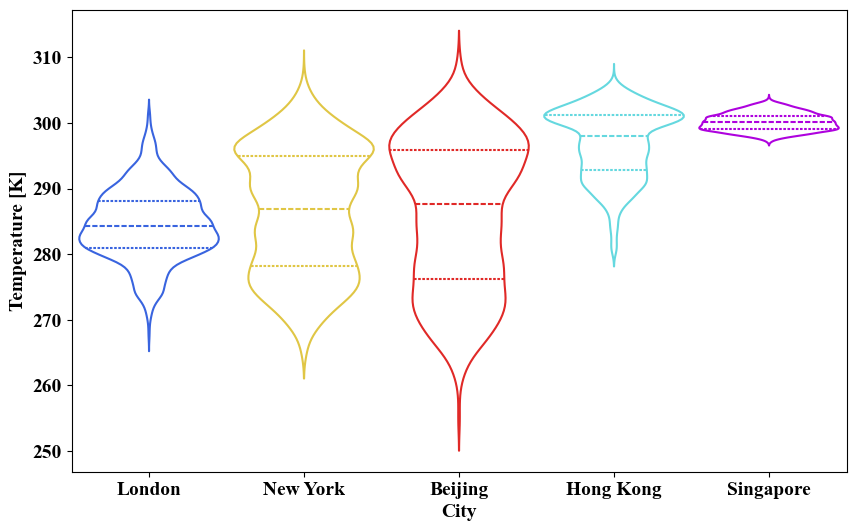

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
colors = ["#3964DF", "#E0C645","#E02927",  "#65D8DF", "#AE02DE"]
#sns.boxplot(data=df, x='city', y=0, ax=ax, width=.5, linewidth=1.5, showfliers=False, color='Black', fill=None, zorder=10)
sns.violinplot(data=df, x='city', y=0, ax=ax, width=.9, linewidth=1.5,
               palette=colors, fill=None, split=False, inner="quart")
#sns.stripplot(data=df, x='city', y=0, jitter=0.2, alpha=0.5, ax=ax)

ax.set_xlabel('City')
ax.set_ylabel('Temperature [K]')

fig.savefig('./figs/temp_f.pdf', dpi=300, bbox_inches='tight')